In [3]:
import numpy as np
import matplotlib.pyplot as plt

[-0.00439, -0.0193, 0.5853, 0.0601, 0.0358]
F membrane =  0.07539822368615504 Height protrusion =  0.04365038616031731 [mm]


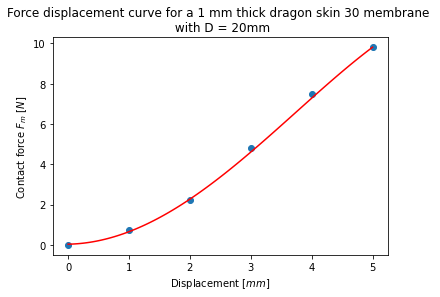

In [24]:
# The following results are from the theisi of Milo Collaris 
t_membrane = 1#mm
D_membrane = 20 # mm

#Values from figure 23
D_c= np.linspace(0,5,6)
F_d = [0, 0.75, 2.25, 4.8, 7.5,9.8]


#Extract coefficients for 4th order fit
#coefficients = np.polyfit(D_c,F_d,4)

#Coefficients from appendix E
coefficients = [-4.39e-3, -1.93e-2,58.53e-2, 6.01e-2, 3.58e-2]

#Create a polynomial curce for this function 
p= np.poly1d(coefficients)

D_c_fit = np.linspace(0,5,100)
F_d_fit = p(D_c_fit)

plt.scatter(D_c,F_d)
plt.plot(D_c_fit,F_d_fit,color='red', label='4th order fit')
plt.xlabel('Displacement [$mm$]')
plt.ylabel('Contact force $F_m$ [$N$]')
plt.title('Force displacement curve for a 1 mm thick dragon skin 30 membrane \n with D = 20mm')
print(coefficients)


P_open = 6e3
D_inlet = 4e-3
desired_F_m = P_open*((np.pi/4)*D_inlet**2) #N
height_protrusion = p(desired_F_m)
print('F membrane = ', desired_F_m,'Height protrusion = ', height_protrusion, '[mm]')


(-6.5963839184784945, 0.0)

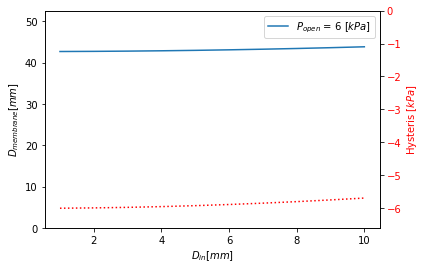

In [5]:
P_open = 6e3
P_open_plot=P_open/1000
F_mem = 8.6#mm
D_in =np.linspace(1e-3,10e-3,10)

D_m= np.sqrt(F_mem*4/(P_open*np.pi)+(D_in)**2)
D_m*1000

A_m = np.pi/4*D_m**2
A_in = np.pi/4*D_in**2

H = A_m-A_in/(A_m*A_in)*F_mem

fig,ax1=plt.subplots()

plt.plot(D_in*1000,D_m*1000, label='$P_{open}$ = %d $[kPa]$' %P_open_plot)
plt.xlabel('$D_{in} [mm]$')
plt.ylabel('$D_{membrane} [mm]$')
plt.ylim(0,max(D_m)*1000*1.2)
plt.legend()

ax2=ax1.twinx()
color='red'
plt.plot(D_in*1000,H/1000, linestyle=':',color=color)
plt.ylabel('Hysteris [$kPa$]',color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(min(H)/1000*1.1,0)



Text(0.5, 1.0, '$P_{open}$ = 2 [$kPa$]')

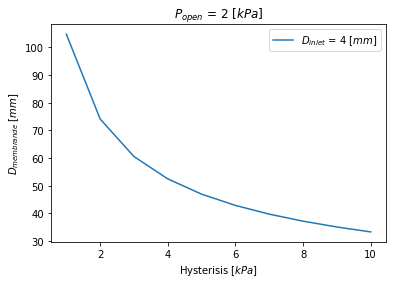

In [6]:
H_sweep = np.linspace(1,10,10)*1e3
D_inlet = 4e-3 # m
D_inlet_plot = D_inlet*1000
A_inlet = np.pi/4*D_inlet**2
A_m_of_H = A_inlet+F_mem/H_sweep
D_of_H= np.sqrt(A_m_of_H*4/np.pi)

A_in_plot= np.pi/4*D_inlet
P_open_plot = F_mem/A_in_plot/1000

plt.plot(H_sweep/1000,D_of_H*1000, label='$D_{inlet}$ = %d [$mm$]'%D_inlet_plot)
plt.xlabel('Hysterisis [$kPa$]')
plt.ylabel('$D_{membrande}$ [$mm$]')
plt.legend()
plt.title('$P_{open}$ = %d [$kPa$]' %P_open_plot)


Text(0, 0.5, '$\\Delta P_{open}$ [$kPa$]')

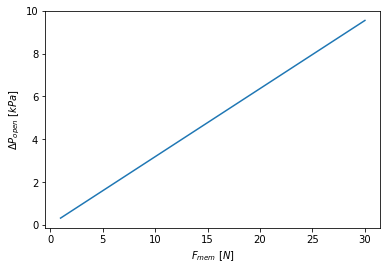

In [7]:
F_mem_sweep = np.linspace(1,30,30)
P_open_sweep = F_mem_sweep/A_in_plot

plt.plot(F_mem_sweep, P_open_sweep/1000)
plt.xlabel('$F_{mem}$ [$N$]')
plt.ylabel('$\\Delta P_{open}$ [$kPa$]')